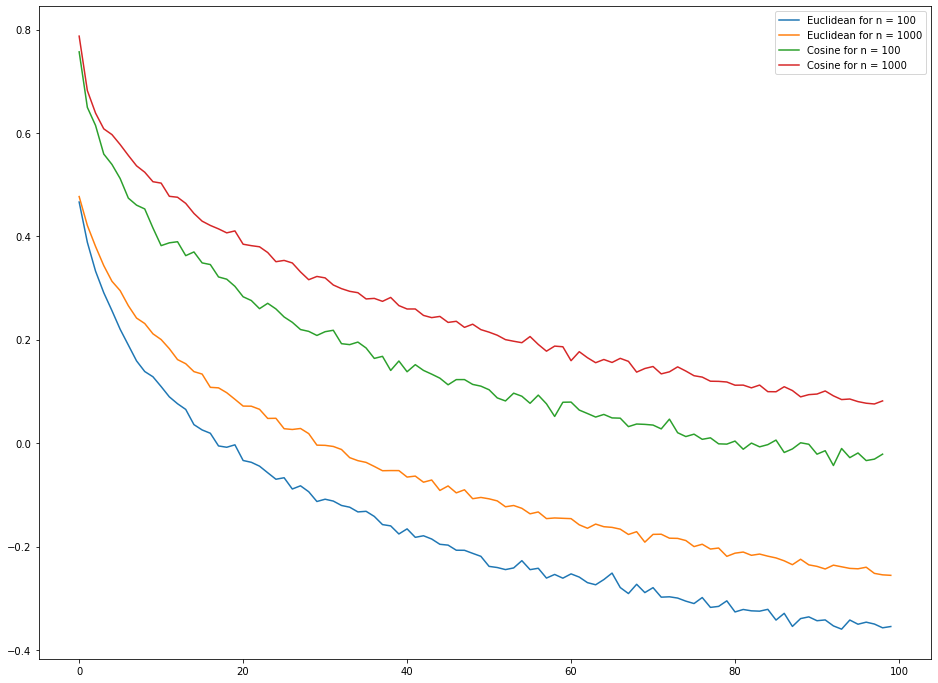

In [7]:
import numpy as np
import sympy as sp
import pandas as pd
from itertools import combinations
from numpy import linalg as LA
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist, squareform

n_list, k_max, max_iter = [100, 1000], 100, 10

n_len = len(n_list)
r_euclid, r_cosine = np.zeros((n_len, k_max)), np.zeros((n_len, k_max))
for i in range(n_len):
    n = n_list[i]
    for k in range(k_max):
        k += 1
        min_dist_euclid, max_dist_euclid, avg_dist_euclid = np.zeros(max_iter), np.zeros(max_iter), np.zeros(max_iter)
        min_dist_cosine, max_dist_cosine, avg_dist_cosine = np.zeros(max_iter), np.zeros(max_iter), np.zeros(max_iter)
        for j in range(max_iter):
            if k == 1:
                points = np.random.rand(n)
                points.sort()
                index, distances = 0, np.zeros((n * (n - 1)) // 2)
                for index1 in range(n - 1):
                    for index2 in range(index1 + 1, n):
                        distances[index] = points[index2] - points[index1]
                        index += 1
                min_dist_euclid[j], max_dist_euclid[j], avg_dist_euclid[j] = np.min(distances), np.max(points) - np.min(points), np.mean(distances)
            else:
                points = np.random.rand(n, k)
                distances = pdist(points, 'euclidean')
                min_dist_euclid[j], max_dist_euclid[j] = np.min(distances), np.max(distances)
                avg_dist_euclid[j] = np.mean(distances)
                distances = pdist(points, 'cosine')
                min_dist_cosine[j], max_dist_cosine[j] = np.min(distances), np.max(distances)
                avg_dist_cosine[j] = np.mean(distances)
        r_euclid[i][k - 1] = np.log10((np.mean(max_dist_euclid) - np.mean(min_dist_euclid)) / np.mean(avg_dist_euclid))
        r_cosine[i][k - 1] = 0 if k == 1 else np.log10((np.mean(max_dist_cosine) - np.mean(min_dist_cosine)) / np.mean(avg_dist_cosine))
        

fig, ax = plt.subplots(figsize=(16, 12))
ax.plot(r_euclid[0], label='Euclidean for n = 100')
ax.plot(r_euclid[1], label='Euclidean for n = 1000')
ax.plot(r_cosine[0][1:], label='Cosine for n = 100')
ax.plot(r_cosine[1][1:], label='Cosine for n = 1000')
leg = ax.legend()
